In [186]:
import pandas as pd
#!conda install -c conda-forge wordcloud==1.4.1 --yes # install wordcloud
#!conda install -c conda-forge geopy --yes 
import json
import folium
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values (OpenStreetMaps)
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from wordcloud import WordCloud, STOPWORDS # import package and its set of stopwords
print ('All imported!')
from folium import plugins

All imported!


In [187]:
lx_df = pd.read_csv('Like_data2.csv', index_col=0)
df_borough = pd.read_csv('Lisboa_Borough.csv', index_col=0)
lx_rest = lx_df[['Borough', 'Places', 'Categories','Likes', 'Latitude', 'Longitude','ID']]
df_chplt = pd.DataFrame()
df_chplt['Borough'] = df_borough['Borough']
data = {'Population':[15617,13943,31813, 20131,31653,21625,12737,16528,36985,22120,15460,19218,20128,45605,37793,13044,33788,21025,27967,22480,12822,11836,33043,15339]}
df_chplt['Population'] = pd.DataFrame(data)
df_chplt.head()

,Borough,Population
0,Ajuda,15617
1,Alcântara,13943
2,Alvalade,31813
3,Areeiro,20131
4,Arroios,31653


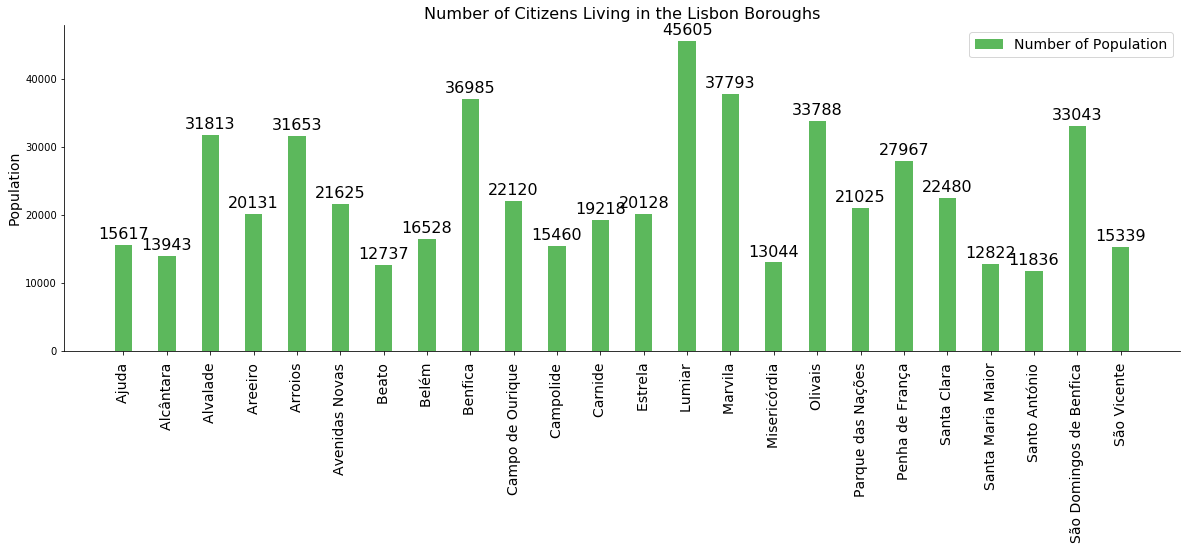

In [188]:
#Bar Graph
labels = []
likes = []
for i in range(len(df_chplt)):
    labels.append(df_chplt.iloc[i,0])
    likes.append(df_chplt.iloc[i,1])
    
x = np.arange(len(labels)) # the label locations
width = 0.4# the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x, likes, width, label='Number of Population',color=('#5cb85c'))
ax.set_ylabel('Population', fontsize=14)
ax.set_title('Number of Citizens Living in the Lisbon Boroughs', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90,fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(fontsize=14)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=16)
        
autolabel(rects1)
fig.set_size_inches(20, 6)
plt.show()

In [189]:
df_cc = pd.DataFrame()
df_can = pd.DataFrame()
df_topo15 = pd.DataFrame()
df_cc = lx_rest.groupby('Categories').count()
df_can['Count']= df_cc['Borough']
df_can.sort_values(['Count'], ascending=True, axis=0, inplace=True)
df_top15 = df_can['Count'].tail(15)
df_topo15['Count'] = df_can['Count'].tail(15)
df_can.head()

,Count
Categories,
African Restaurant,1
Himalayan Restaurant,1
Empanada Restaurant,1
Eastern European Restaurant,1
Swiss Restaurant,1


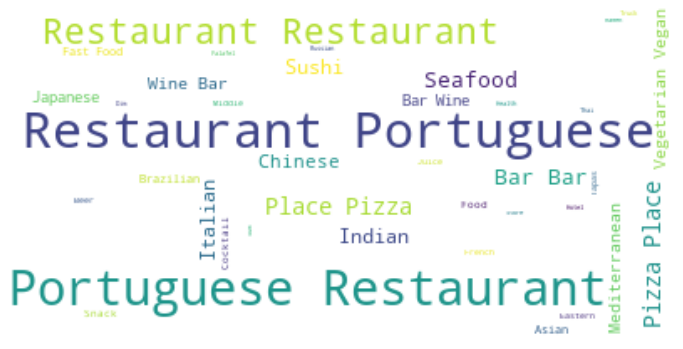

In [190]:
total_rest = df_can['Count'].sum()
total_rest
max_words = 300
word_string = ''
for Categories in df_can.index.values:
    # check if country's name is a single-word name    
    repeat_num_times = int(df_can.loc[Categories, 'Count']/float(total_rest)*max_words)
    word_string = word_string + ((Categories + ' ') * repeat_num_times)
                                     
# display the generated text
#word_string
wordcloud = WordCloud(background_color='white').generate(word_string)
# display the cloud
fig = plt.figure()
fig.set_figwidth(12)
fig.set_figheight(14)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

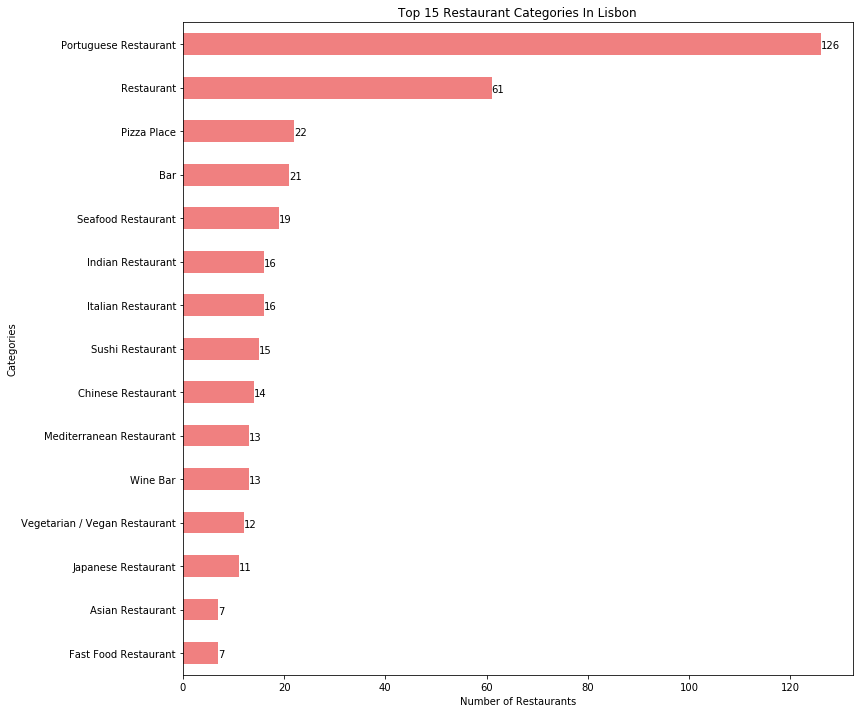

In [191]:
### type your answer here
df_top15.plot(kind='barh', figsize=(12, 12), color=['lightcoral'])
plt.xlabel('Number of Restaurants')
plt.title('Top 15 Restaurant Categories In Lisbon')

# annotate value labels to each country
for index, value in enumerate(df_top15): 
    label = format(int(value), ',') # format int with commas
    
    plt.annotate(label, xy=(value , index - 0.10), color='black')

plt.show()

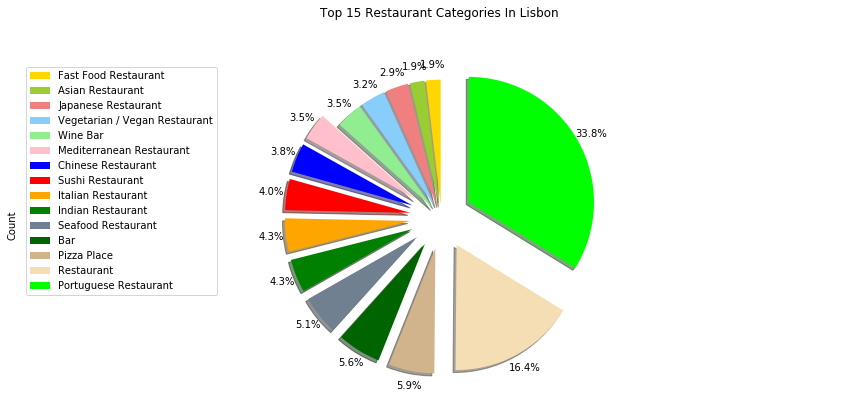

In [192]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink','b','r','orange','green','slategrey','darkgreen','tan','wheat','lime']
explode_list = [0.1, 0.1, 0.1, 0.1, 0.1, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25] # ratio for each continent with which to offset each wedge.

df_topo15['Count'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Top 15 Restaurant Categories In Lisbon', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_topo15.index, loc='upper left') 

plt.show()

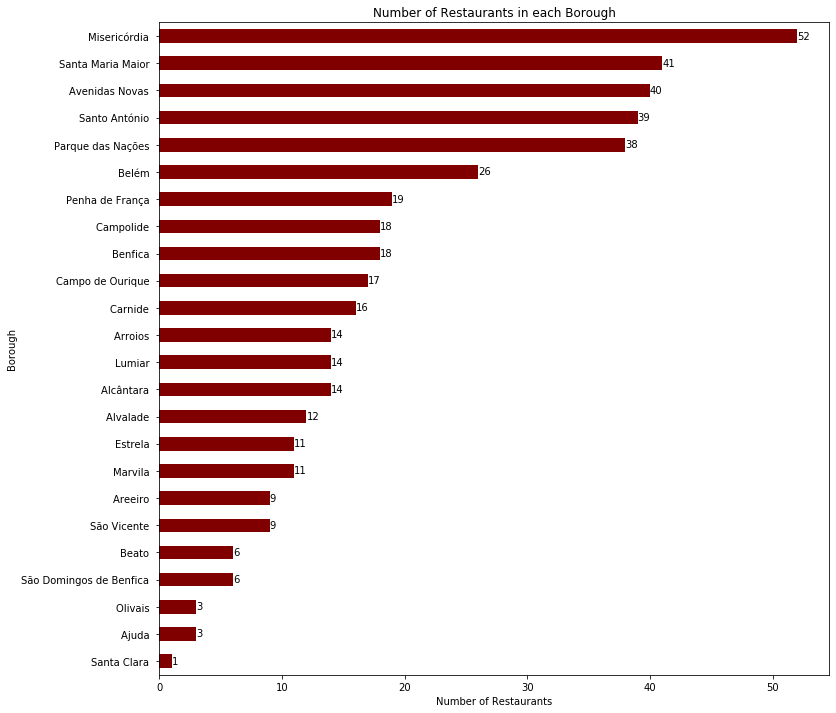

In [193]:
lx_rest
df_b = pd.DataFrame()
df_bb = pd.DataFrame()
df_btop15 = pd.DataFrame()
df_b = lx_rest.groupby('Borough').count()
df_bb['Count']= df_b['Places']
df_bb.sort_values(['Count'], ascending=True, axis=0, inplace=True)
df_bbb = df_bb['Count']

### type your answer here
df_bbb.plot(kind='barh', figsize=(12, 12), color=['maroon'])
plt.xlabel('Number of Restaurants')
plt.title('Number of Restaurants in each Borough')

# annotate value labels to each country
for index, value in enumerate(df_bbb): 
    label = format(int(value), ',') # format int with commas
    
    plt.annotate(label, xy=(value , index - 0.10), color='black')

plt.show()

In [194]:
lx_latitude = 38.7077507
lx_longitude = -9.1365919
# let's start again with a clean copy of the map of San Francisco
lx_map = folium.Map(location = [lx_latitude, lx_longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
rest = plugins.MarkerCluster().add_to(lx_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(lx_rest.Latitude, lx_rest.Longitude, lx_rest.Borough):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(rest)

# display map
lx_map

In [196]:
lx_max = lx_df['Likes'].max()
lx_min = lx_df['Likes'].min()
lx_median =lx_df['Likes'].median()
lx_mean = lx_df['Likes'].mean()

poor = lx_df['Likes']<lx_median
below_avg = lx_df[(lx_df['Likes']>lx_min) & (lx_df['Likes']<=lx_mean)]
abv_avg = lx_df[(lx_df['Likes']>lx_mean) & (lx_df['Likes']<=lx_median+lx_mean)]
great = lx_df['Likes']>lx_median+lx_mean

##  K-Clustering

In [197]:
#lx_df 
#df_borough
#lx_rest 
#df_chplt
#df_bb
#df_can
#df_topo15
print('There are {} unique restaurant categories.'.format(len(df_can)))
print('There are {} unique Lisbon Boroughs.'.format(len(df_bb)))

There are 47 unique restaurant categories.
There are 24 unique Lisbon Boroughs.


In [198]:
lx_rest_f = pd.DataFrame()
lx_rest_f = lx_rest 
lx_rest_f

,Borough,Places,Categories,Likes,Latitude,Longitude,ID
0,Ajuda,Restaurante Andorinhas,Restaurant,23,38.704911,-9.199349,4d9885d59079b1f7a0182d0a
1,Ajuda,Páteo Alfacinha,Restaurant,44,38.706537,-9.194202,4c532ced72cf0f47267c71d2
2,Ajuda,Estufa Real,Restaurant,25,38.706840,-9.201975,4b0588a4f964a520ced122e3
3,Alcântara,Alcântara 50,Portuguese Restaurant,27,38.705462,-9.173533,50899fb2e4b0167a9c2eddf4
4,Alcântara,O Palácio,Seafood Restaurant,86,38.706357,-9.173442,4c5c82867735c9b6507f8c72
...,...,...,...,...,...,...,...
432,São Vicente,O Pitéu da Graça,Mediterranean Restaurant,81,38.717349,-9.130012,4c8a375452a98cfaa3612ae9
433,São Vicente,Penalva da Graça,Seafood Restaurant,12,38.720722,-9.130070,4f89e174e4b00a6262549ad1
434,São Vicente,Taproom Oitava Colina,Beer Bar,12,38.718390,-9.131880,5b4928789f8a9f002c28cc08
435,São Vicente,O Cardoso do Estrela de Ouro,Portuguese Restaurant,9,38.720650,-9.130091,4c892b94a0ffb60c7f4228c5


In [199]:
lx_rest_f.groupby('Borough').count()
print('There are {} uniques categories.'.format(len(lx_rest_f['Categories'].unique())))

There are 47 uniques categories.


In [200]:
lx_onehot = pd.get_dummies(lx_rest_f[['Categories']], prefix="", prefix_sep="") # one hot encoding
lx_onehot['Borough'] = lx_rest_f['Borough'] # add neighborhood column back to dataframe
fixed_columns = [lx_onehot.columns[-1]] + list(lx_onehot.columns[:-1]) # move neighborhood column to the first column
lx_onehot = lx_onehot[fixed_columns]
lx_onehot.head()
lx_onehot.shape

(437, 48)

In [201]:
lx_grouped = lx_onehot.groupby('Borough').mean().reset_index()
lx_grouped
lx_grouped.shape

(24, 48)

In [202]:
num_top_rest = 5

for hood in lx_grouped['Borough']:
    #print("----"+hood+"----")
    temp = lx_grouped[lx_grouped['Borough'] == hood].T.reset_index()
    temp.columns = ['Cate','Freq']
    temp = temp.iloc[1:]
    temp['Freq'] = temp['Freq'].astype(float)
    temp = temp.round({'Freq': 2})
    #print(temp.sort_values('Freq', ascending=False).reset_index(drop=True).head(num_top_rest))
    #print('\n')

#Example of for loop result
print("----"+hood+"----")
print(temp.sort_values('Freq', ascending=False).reset_index(drop=True).head(num_top_rest))
print('\n')

----São Vicente ----
                       Cate  Freq
0  Mediterranean Restaurant  0.22
1     Portuguese Restaurant  0.22
2         Indian Restaurant  0.11
3                  Beer Bar  0.11
4        Seafood Restaurant  0.11




In [205]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [239]:
num_top_rest = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_rest):
    try:
        columns.append('{}{} Most Common Category'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Category'.format(ind+1))

# create a new dataframe
categories_rest_sorted = pd.DataFrame(columns=columns)
categories_rest_sorted['Borough'] = lx_grouped['Borough']

for ind in np.arange(lx_grouped.shape[0]):
    categories_rest_sorted.iloc[ind, 1:] = return_most_common_venues(lx_grouped.iloc[ind, :], num_top_rest)

categories_rest_sorted.head()

,Borough,1st Most Common Category,2nd Most Common Category,3rd Most Common Category,4th Most Common Category,5th Most Common Category,6th Most Common Category,7th Most Common Category,8th Most Common Category,9th Most Common Category,10th Most Common Category
0,Ajuda,Restaurant,Wine Bar,Eastern European Restaurant,Health Food Store,Gay Bar,French Restaurant,Food Truck,Food Service,Food,Fast Food Restaurant
1,Alcântara,Portuguese Restaurant,Mediterranean Restaurant,Seafood Restaurant,Eastern European Restaurant,Pizza Place,Restaurant,Indian Restaurant,Beer Bar,Sushi Restaurant,Beer Garden
2,Alvalade,Portuguese Restaurant,Bar,Persian Restaurant,Pizza Place,Snack Place,Indian Restaurant,Thai Restaurant,Beer Bar,Eastern European Restaurant,French Restaurant
3,Areeiro,Portuguese Restaurant,Asian Restaurant,Italian Restaurant,Chinese Restaurant,Restaurant,Pizza Place,Wine Bar,Eastern European Restaurant,French Restaurant,Food Truck
4,Arroios,Portuguese Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,Brazilian Restaurant,Chinese Restaurant,Restaurant,Mediterranean Restaurant,Argentinian Restaurant,Falafel Restaurant


In [240]:
#Run k-means to cluster the neighborhood into 5 clusters.
# set number of clusters
kclusters = 5
lx_grouped_clustering = lx_grouped.drop('Borough', 1)
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(lx_grouped_clustering)
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]


# add clustering labels
categories_rest_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
lx_merged = lx_rest_f[['Places','Borough','Likes','Latitude','Longitude']]

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
lx_merged = lx_merged.join(categories_rest_sorted.set_index('Borough'), on='Borough')

# check the last columns!
lx_merged.head()

,Places,Borough,Likes,Latitude,Longitude,Cluster Labels,1st Most Common Category,2nd Most Common Category,3rd Most Common Category,4th Most Common Category,5th Most Common Category,6th Most Common Category,7th Most Common Category,8th Most Common Category,9th Most Common Category,10th Most Common Category
0,Restaurante Andorinhas,Ajuda,23,38.704911,-9.199349,1,Restaurant,Wine Bar,Eastern European Restaurant,Health Food Store,Gay Bar,French Restaurant,Food Truck,Food Service,Food,Fast Food Restaurant
1,Páteo Alfacinha,Ajuda,44,38.706537,-9.194202,1,Restaurant,Wine Bar,Eastern European Restaurant,Health Food Store,Gay Bar,French Restaurant,Food Truck,Food Service,Food,Fast Food Restaurant
2,Estufa Real,Ajuda,25,38.706840,-9.201975,1,Restaurant,Wine Bar,Eastern European Restaurant,Health Food Store,Gay Bar,French Restaurant,Food Truck,Food Service,Food,Fast Food Restaurant
3,Alcântara 50,Alcântara,27,38.705462,-9.173533,2,Portuguese Restaurant,Mediterranean Restaurant,Seafood Restaurant,Eastern European Restaurant,Pizza Place,Restaurant,Indian Restaurant,Beer Bar,Sushi Restaurant,Beer Garden
4,O Palácio,Alcântara,86,38.706357,-9.173442,2,Portuguese Restaurant,Mediterranean Restaurant,Seafood Restaurant,Eastern European Restaurant,Pizza Place,Restaurant,Indian Restaurant,Beer Bar,Sushi Restaurant,Beer Garden


#### Cluster 1

In [257]:
k1 = lx_merged.loc[lx_merged['Cluster Labels'] == 0, lx_merged.columns[[1] + list(range(5, lx_merged.shape[1]))]]
k1.drop_duplicates() 

,Borough,Cluster Labels,1st Most Common Category,2nd Most Common Category,3rd Most Common Category,4th Most Common Category,5th Most Common Category,6th Most Common Category,7th Most Common Category,8th Most Common Category,9th Most Common Category,10th Most Common Category
52,Avenidas Novas,0,Portuguese Restaurant,Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Pizza Place,Asian Restaurant,Fast Food Restaurant,Sushi Restaurant,Brazilian Restaurant,Japanese Restaurant
124,Benfica,0,Portuguese Restaurant,Seafood Restaurant,Restaurant,Asian Restaurant,Sushi Restaurant,Food,Chinese Restaurant,Pizza Place,Dim Sum Restaurant,French Restaurant
142,Campo de Ourique,0,Portuguese Restaurant,Bar,Restaurant,Seafood Restaurant,Italian Restaurant,Japanese Restaurant,Pizza Place,Indian Restaurant,Cantonese Restaurant,Brazilian Restaurant
159,Campolide,0,Restaurant,Portuguese Restaurant,Seafood Restaurant,French Restaurant,Japanese Restaurant,Fast Food Restaurant,Falafel Restaurant,Dim Sum Restaurant,Pizza Place,Health Food Store
177,Carnide,0,Portuguese Restaurant,Sushi Restaurant,Restaurant,Dim Sum Restaurant,Tapas Restaurant,Asian Restaurant,Food,Mediterranean Restaurant,Pizza Place,Food Truck
204,Lumiar,0,Pizza Place,Japanese Restaurant,Fast Food Restaurant,Chinese Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,Sushi Restaurant,Wine Bar,Eastern European Restaurant
218,Marvila,0,Restaurant,Portuguese Restaurant,Pizza Place,Argentinian Restaurant,Mediterranean Restaurant,Wine Bar,French Restaurant,Food Truck,Food Service,Food
284,Parque das Nações,0,Portuguese Restaurant,Restaurant,Sushi Restaurant,Chinese Restaurant,Seafood Restaurant,Bar,Hotel Bar,Italian Restaurant,Pizza Place,Falafel Restaurant
422,São Domingos de Benfica,0,Bar,Japanese Restaurant,Food Truck,Seafood Restaurant,Fast Food Restaurant,Portuguese Restaurant,Wine Bar,Eastern European Restaurant,Gay Bar,French Restaurant


#### Cluster 2

In [256]:
k2 = lx_merged.loc[lx_merged['Cluster Labels'] == 1, lx_merged.columns[[1] + list(range(5, lx_merged.shape[1]))]]
k2.drop_duplicates() 

,Borough,Cluster Labels,1st Most Common Category,2nd Most Common Category,3rd Most Common Category,4th Most Common Category,5th Most Common Category,6th Most Common Category,7th Most Common Category,8th Most Common Category,9th Most Common Category,10th Most Common Category
0,Ajuda,1,Restaurant,Wine Bar,Eastern European Restaurant,Health Food Store,Gay Bar,French Restaurant,Food Truck,Food Service,Food,Fast Food Restaurant
92,Beato,1,Restaurant,Tapas Restaurant,Cantonese Restaurant,Wine Bar,Eastern European Restaurant,Gay Bar,French Restaurant,Food Truck,Food Service,Food
281,Olivais,1,Restaurant,Chinese Restaurant,Wine Bar,Eastern European Restaurant,Health Food Store,Gay Bar,French Restaurant,Food Truck,Food Service,Food


#### Cluster 3

In [254]:
k3 = lx_merged.loc[lx_merged['Cluster Labels'] == 2, lx_merged.columns[[1] + list(range(5, lx_merged.shape[1]))]]
k3.drop_duplicates() 

,Borough,Cluster Labels,1st Most Common Category,2nd Most Common Category,3rd Most Common Category,4th Most Common Category,5th Most Common Category,6th Most Common Category,7th Most Common Category,8th Most Common Category,9th Most Common Category,10th Most Common Category
3,Alcântara,2,Portuguese Restaurant,Mediterranean Restaurant,Seafood Restaurant,Eastern European Restaurant,Pizza Place,Restaurant,Indian Restaurant,Beer Bar,Sushi Restaurant,Beer Garden
38,Arroios,2,Portuguese Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,Brazilian Restaurant,Chinese Restaurant,Restaurant,Mediterranean Restaurant,Argentinian Restaurant,Falafel Restaurant
229,Misericórdia,2,Portuguese Restaurant,Bar,Wine Bar,Cocktail Bar,Restaurant,Italian Restaurant,Juice Bar,Pizza Place,Brazilian Restaurant,French Restaurant
342,Santa Maria Maior,2,Portuguese Restaurant,Wine Bar,Restaurant,Indian Restaurant,Bar,Mediterranean Restaurant,African Restaurant,Ramen Restaurant,Food Service,Vegetarian / Vegan Restaurant
428,São Vicente,2,Mediterranean Restaurant,Portuguese Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Bar,Beer Bar,Seafood Restaurant,Empanada Restaurant,French Restaurant,Food Truck


### Cluster 4

In [255]:
k4 = lx_merged.loc[lx_merged['Cluster Labels'] == 3, lx_merged.columns[[1] + list(range(5, lx_merged.shape[1]))]]
k4.drop_duplicates() 

,Borough,Cluster Labels,1st Most Common Category,2nd Most Common Category,3rd Most Common Category,4th Most Common Category,5th Most Common Category,6th Most Common Category,7th Most Common Category,8th Most Common Category,9th Most Common Category,10th Most Common Category
341,Santa Clara,3,Portuguese Restaurant,Wine Bar,Hotel Bar,Health Food Store,Gay Bar,French Restaurant,Food Truck,Food Service,Food,Fast Food Restaurant


#### Cluster 5

In [253]:
k5 = lx_merged.loc[lx_merged['Cluster Labels'] == 4, lx_merged.columns[[1] + list(range(5, lx_merged.shape[1]))]]
k5.drop_duplicates() 

,Borough,Cluster Labels,1st Most Common Category,2nd Most Common Category,3rd Most Common Category,4th Most Common Category,5th Most Common Category,6th Most Common Category,7th Most Common Category,8th Most Common Category,9th Most Common Category,10th Most Common Category
17,Alvalade,4,Portuguese Restaurant,Bar,Persian Restaurant,Pizza Place,Snack Place,Indian Restaurant,Thai Restaurant,Beer Bar,Eastern European Restaurant,French Restaurant
29,Areeiro,4,Portuguese Restaurant,Asian Restaurant,Italian Restaurant,Chinese Restaurant,Restaurant,Pizza Place,Wine Bar,Eastern European Restaurant,French Restaurant,Food Truck
98,Belém,4,Portuguese Restaurant,Restaurant,Pizza Place,Chinese Restaurant,Fast Food Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Mediterranean Restaurant,French Restaurant
193,Estrela,4,Portuguese Restaurant,Pizza Place,Vegetarian / Vegan Restaurant,Bar,Japanese Restaurant,Restaurant,French Restaurant,Food Truck,Food Service,Food
322,Penha de França,4,Portuguese Restaurant,Snack Place,Chinese Restaurant,Indian Restaurant,Asian Restaurant,Italian Restaurant,Restaurant,Pizza Place,Middle Eastern Restaurant,Bar
383,Santo António,4,Portuguese Restaurant,Restaurant,Pizza Place,Russian Restaurant,Middle Eastern Restaurant,Italian Restaurant,Japanese Restaurant,Brazilian Restaurant,Himalayan Restaurant,Mediterranean Restaurant


In [221]:
# create map
map_clusters = folium.Map(location=[lx_latitude, lx_longitude], zoom_start=12.5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(lx_merged['Latitude'], lx_merged['Longitude'], lx_merged['Borough'], lx_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        #color=rainbow[cluster-1],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters